# EDA Seasonality Starter Notebook

## 1. Prerequisites and Loading the Data

In [1]:
# Necessary packages
import numpy as np
import pandas as pd
import re

# Plotting
import matplotlib.pyplot as plt

In [2]:
# Loading the data
seasonality_df = pd.read_csv('data/seasonality_data.csv', index_col=0)

# Extract the month names in the index of seasonality_df
temp_dict = dict()

for i in seasonality_df.index:
    match = re.search(r"Seasonality_Index_(\w+)$", i)
    if match:
        temp_dict[i] = match.group(1)
    else:
        pass

seasonality_df = seasonality_df.rename(index=temp_dict)

In [3]:
display(seasonality_df)

,AC,ACEN,AEV,AGI,ALI,AREIT,BDO,BLOOM,BPI,CBC,...,MBT,MER,MONDE,PGOLD,SCC,SM,SMC,SMPH,TEL,URC
January,1.085499,1.039728,1.129890,1.109409,1.077410,1.050016,0.979305,1.041532,0.965547,0.854247,...,0.956034,0.938536,1.051909,1.040978,0.958592,1.017463,1.028236,1.045155,1.007633,1.057061
February,1.075501,0.992101,1.105525,1.135397,1.094022,1.056174,1.053018,1.120378,1.012886,0.912591,...,1.004850,0.967993,1.061691,1.001295,0.948160,1.007293,1.034151,1.074292,0.988781,1.048028
March,1.016639,0.933867,1.096346,1.103001,1.044585,1.042062,1.029921,1.089848,0.996696,0.928765,...,1.014176,0.977539,0.998620,0.960650,0.989466,1.015177,1.020343,1.050928,0.996808,1.005615
April,0.971656,0.892726,1.037275,1.058245,0.981637,0.994552,1.060811,1.056362,1.036725,0.983167,...,1.075108,1.011565,0.926049,0.960277,1.024233,1.005718,1.016750,0.991943,1.025651,0.981479
May,0.942473,0.881619,0.990998,1.053464,0.910649,0.958150,1.040318,1.127828,1.047646,1.043833,...,1.070852,1.018581,0.965212,0.930512,1.056828,0.986745,0.998154,0.974174,1.037076,1.019782
June,0.966019,0.978200,0.950826,0.979276,0.957837,0.944951,0.934440,0.993561,0.941633,0.929564,...,0.948411,0.945036,0.980238,0.982016,0.882482,0.991515,1.023953,1.016879,0.967662,1.010036
July,0.928333,1.000693,0.939544,0.955366,0.939073,0.959055,0.962937,0.991900,0.984412,0.959681,...,0.950345,0.968216,0.989762,0.971447,0.962273,0.994379,1.015638,1.002677,0.966902,1.031966
August,0.964596,1.056918,0.936650,0.954901,0.981452,0.982419,0.970385,0.961446,0.977885,0.961019,...,0.962549,0.966101,1.020465,0.993365,0.990077,0.995463,0.986833,0.991231,0.992529,0.993922
September,1.002802,1.031038,0.965679,0.959451,1.008330,0.982092,0.993060,0.977140,0.986978,1.004698,...,0.993994,1.008865,1.066999,1.041334,1.027685,0.996640,0.979987,0.973898,1.004277,0.985799
October,1.013113,1.052827,0.972533,0.924096,1.014234,0.987820,1.023168,0.940262,1.031243,1.123562,...,1.029352,1.071107,1.001687,1.029872,1.106271,0.993640,0.971570,0.969152,1.015398,0.968893


In [4]:
seasonality_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, January to December
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AC      12 non-null     float64
 1   ACEN    12 non-null     float64
 2   AEV     12 non-null     float64
 3   AGI     12 non-null     float64
 4   ALI     12 non-null     float64
 5   AREIT   12 non-null     float64
 6   BDO     12 non-null     float64
 7   BLOOM   12 non-null     float64
 8   BPI     12 non-null     float64
 9   CBC     12 non-null     float64
 10  CNPF    12 non-null     float64
 11  CNVRG   12 non-null     float64
 12  DMC     12 non-null     float64
 13  EMI     12 non-null     float64
 14  GLO     12 non-null     float64
 15  GTCAP   12 non-null     float64
 16  ICT     12 non-null     float64
 17  JFC     12 non-null     float64
 18  JGS     12 non-null     float64
 19  LTG     12 non-null     float64
 20  MBT     12 non-null     float64
 21  MER     12 non-null     float64
 2

## 2. Seasonality EDA

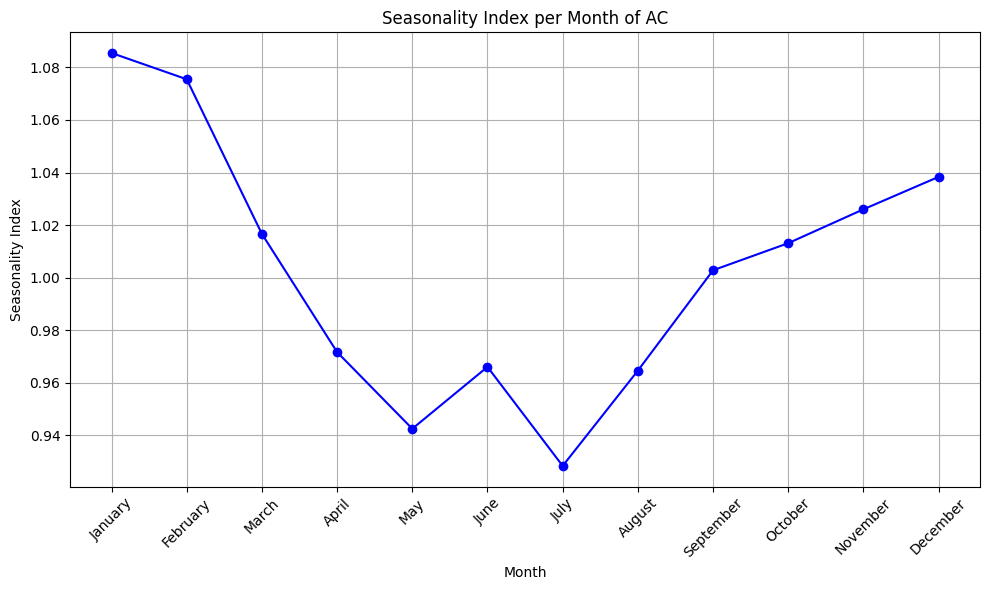

In [8]:
ticker = 'AC'

plt.figure(figsize=(10, 6))
plt.plot(seasonality_df.index, seasonality_df[ticker], marker='o', linestyle='-', color='blue')
plt.title(f"Seasonality Index per Month of {ticker}")
plt.xlabel('Month')
plt.ylabel('Seasonality Index')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

*{Place analysis of the seasonality of the stock here below the plt graph}*

### Notes in using this Seasonality EDA Starter Notebook

Note: To do the EDA of the seasonality of the other stock, just duplicate the above code cells and replace the stock ticker in the line `ticker = 'AC'`

* You might also want to consider replacing the color of the line for differentiation to the other stock